### Step 1: Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

### Step 2: Load and Explore the Dataset
- Load the CSV file
- Display basic information about the dataset
- Check data types and structure

In [2]:
students_db = pd.read_csv('StudentPerformanceFactors.csv')

In [3]:
students_db.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
students_db.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [5]:
students_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### Step 3: Data Cleaning and Preprocessing
- Check for missing values and handle them
- Remove duplicates if any
- Verify data quality

In [6]:
students_db.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [7]:
students_db=students_db.dropna()

In [8]:
students_db.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

### Checking Duplicate Rows


In [9]:
students_db.duplicated().sum()

np.int64(0)



---



### Check Unique Values

In [10]:
continuous_cols = [
    'Hours_Studied', 'Sleep_Hours', 'Attendance',
    'Previous_Scores', 'Tutoring_Sessions',
    'Physical_Activity', 'Exam_Score'
]

for col in continuous_cols:
    print(f"\nUnique values in '{col}':")
    print(students_db[col].unique())



Unique values in 'Hours_Studied':
[23 19 24 29 25 17 21  9 10 14 22 15 12 20 11 13 16 18 31  8 26 28  4 35
 27 33 36 43 34  1 30  7 32  6 38  5  3 39  2 37 44]

Unique values in 'Sleep_Hours':
[ 7  8  6 10  9  5  4]

Unique values in 'Attendance':
[ 84  64  98  89  92  88  78  94  80  97  83  82  68  60  70  75  99  74
  65  62  91  90  66  69  72  63  61  86  77  71  67  87  73  96 100  81
  95  79  85  76  93]

Unique values in 'Previous_Scores':
[ 73  59  91  98  65  89  68  50  80  71  88  87  97  72  74  70  82  58
  99  84 100  75  54  90  94  51  57  66  96  93  56  52  63  79  81  69
  95  60  92  77  62  85  78  64  76  55  86  61  53  83  67]

Unique values in 'Tutoring_Sessions':
[0 2 1 3 4 5 6 7 8]

Unique values in 'Physical_Activity':
[3 4 2 1 5 0 6]

Unique values in 'Exam_Score':
[ 67  61  74  71  70  66  69  72  68  65  64  60  63  62 100  76  79  73
  78  89  75  59  86  97  83  84  80  58  94  55  92  82  77 101  88  91
  99  87  57  96  98  95  85  93  56]


### Check The Outliers

In [11]:
outliers_dict = {}

for col in continuous_cols:
    Q1 = students_db[col].quantile(0.25)
    Q3 = students_db[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = students_db[(students_db[col] < lower_bound) | (students_db[col] > upper_bound)]

    if not outliers.empty:
        outliers_dict[col] = {
            'count': len(outliers),
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'indices': outliers.index.tolist()
        }

# 4. Print summary of detected outliers
for col, info in outliers_dict.items():
    print(f"\nOutliers in '{col}': {info['count']} rows")
    print(f"  - Lower Bound: {info['lower_bound']:.2f}")
    print(f"  - Upper Bound: {info['upper_bound']:.2f}")



Outliers in 'Hours_Studied': 40 rows
  - Lower Bound: 4.00
  - Upper Bound: 36.00

Outliers in 'Tutoring_Sessions': 423 rows
  - Lower Bound: -0.50
  - Upper Bound: 3.50

Outliers in 'Exam_Score': 103 rows
  - Lower Bound: 59.00
  - Upper Bound: 75.00


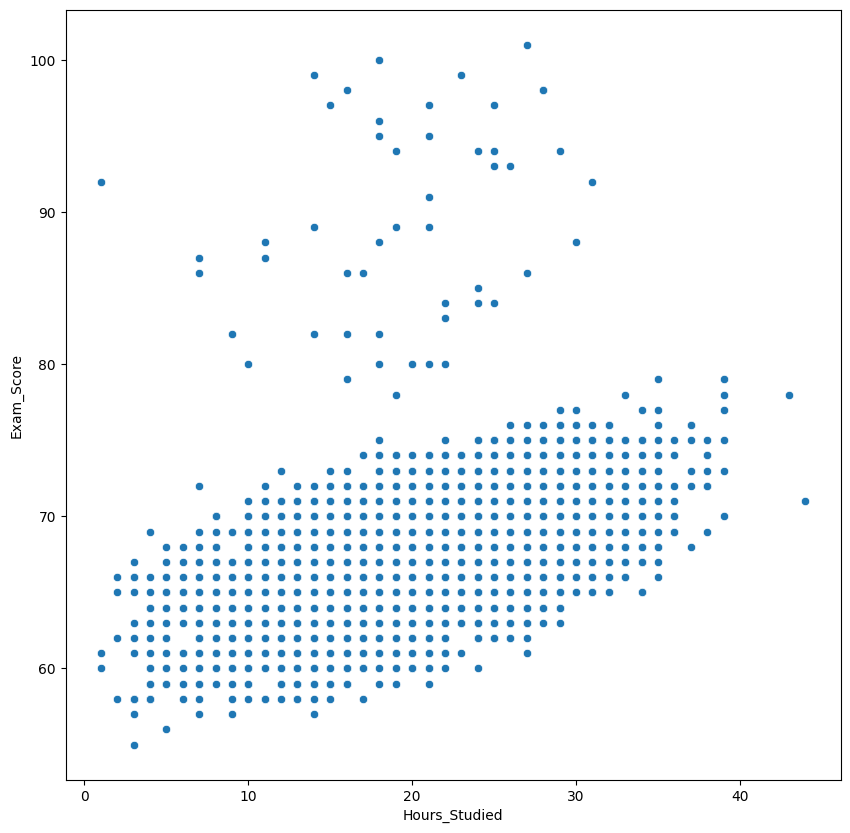

In [12]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=students_db, )
plt.show()

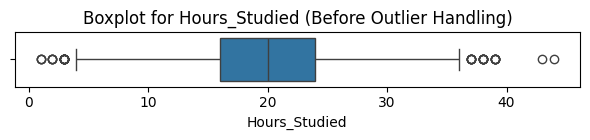

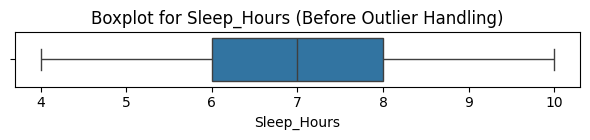

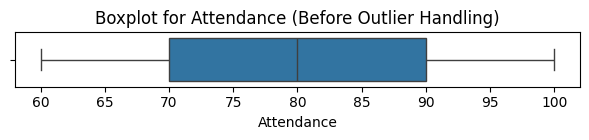

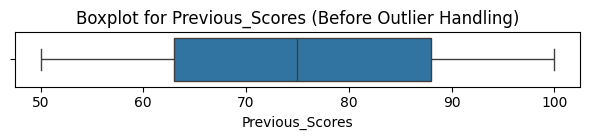

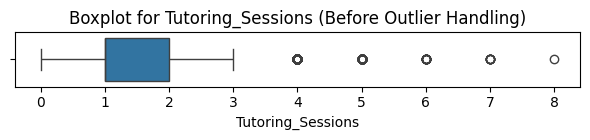

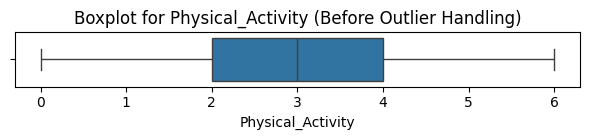

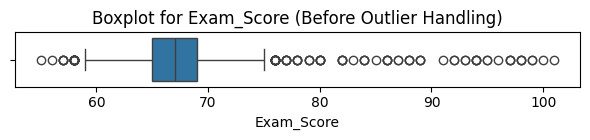

In [13]:
for col in continuous_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=students_db[col])
    plt.title(f"Boxplot for {col} (Before Outlier Handling)")
    plt.tight_layout()
    plt.show()

In [14]:
''' def cap_outliers_iqr(students_db, col):
    Q1 = students_db[col].quantile(0.25)
    Q3 = dstudents_dbf[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    students_db[col] = students_db[col].clip(lower=lower_bound, upper=upper_bound)

for col in continuous_cols:
    cap_outliers_iqr(students_db, col) '''

' def cap_outliers_iqr(students_db, col):\n    Q1 = students_db[col].quantile(0.25)\n    Q3 = dstudents_dbf[col].quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    students_db[col] = students_db[col].clip(lower=lower_bound, upper=upper_bound)\n\nfor col in continuous_cols:\n    cap_outliers_iqr(students_db, col) '

##### The problem here with IQR method it's too aggrieve so we can look in different way

Removing outliers from dataset based on the Z-score method (A z-score is calculated by taking an individual data point, subtracting the mean of the dataset, and then dividing the result by the standard deviation of the dataset)

In [15]:
from scipy.stats import zscore
numeric_df = students_db.select_dtypes(include=['number'])
z_scores = np.abs(zscore(numeric_df))
threshold = 3
students_db = students_db[(z_scores < threshold).all(axis=1)]


### Visualize again after capping

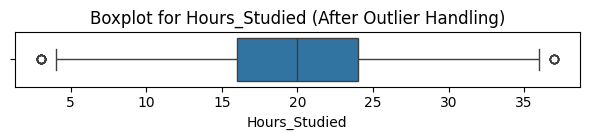

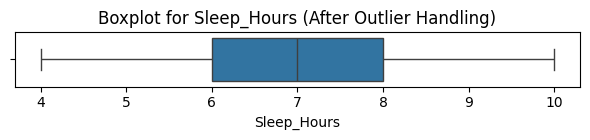

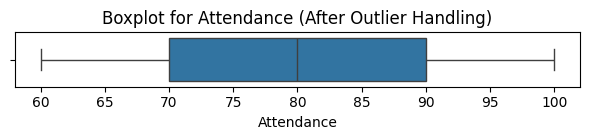

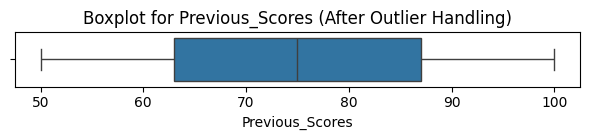

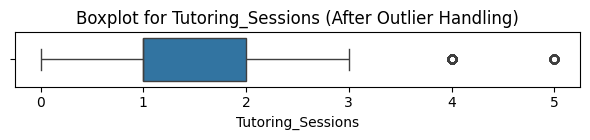

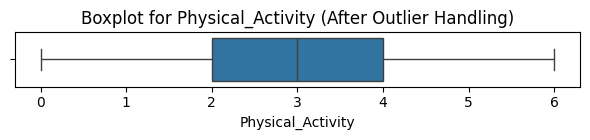

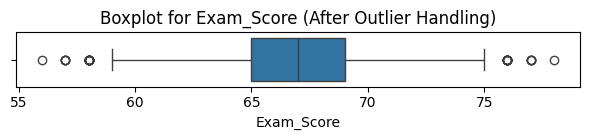

In [16]:
for col in continuous_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=students_db[col])
    plt.title(f"Boxplot for {col} (After Outlier Handling)")
    plt.tight_layout()
    plt.show()

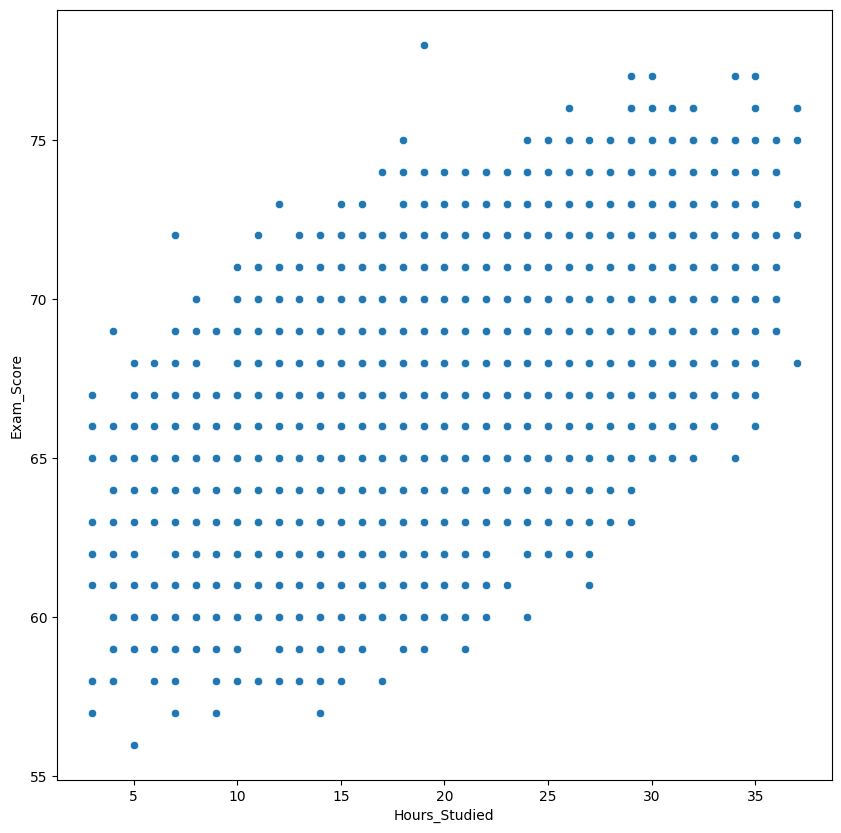

In [17]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=students_db, )
plt.show()

### Step 4: Exploratory Data Analysis
- Analyze target variable distribution
- Create correlation matrix for numerical features
- Visualize relationships between variables
- Analyze categorical variables' impact on exam scores


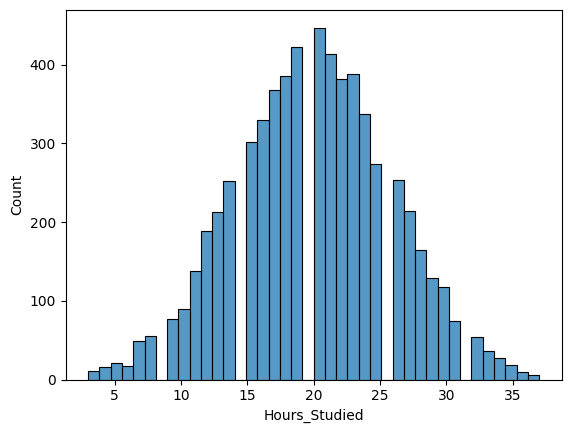

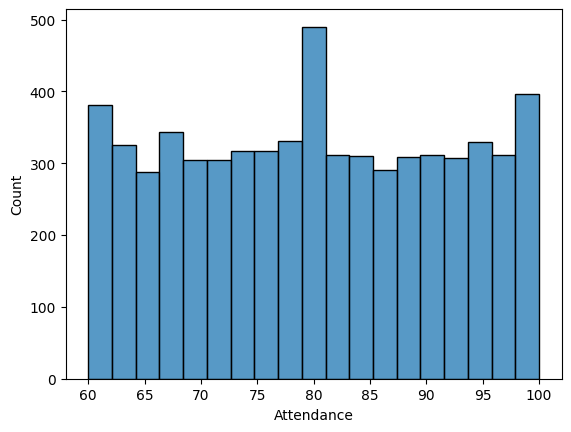

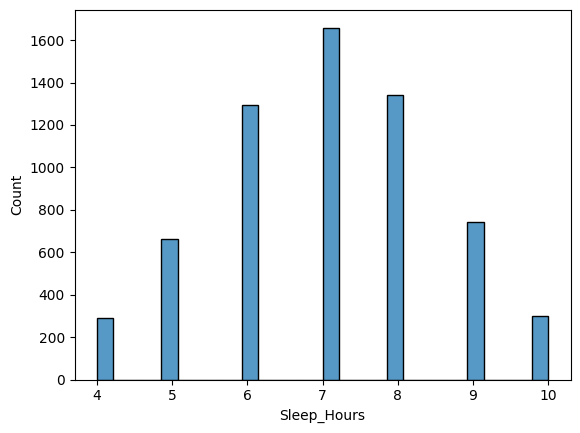

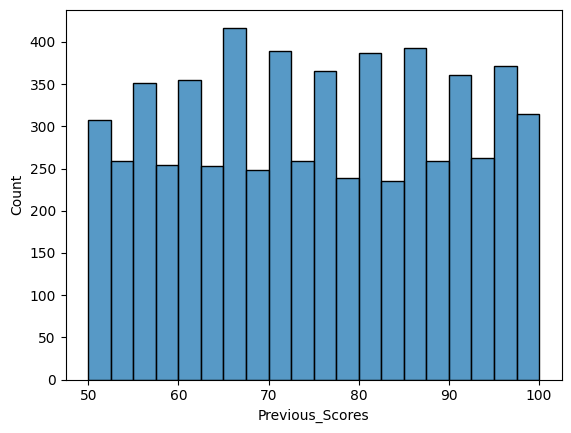

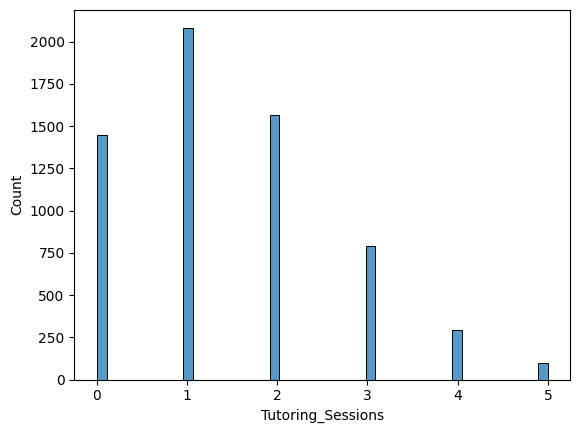

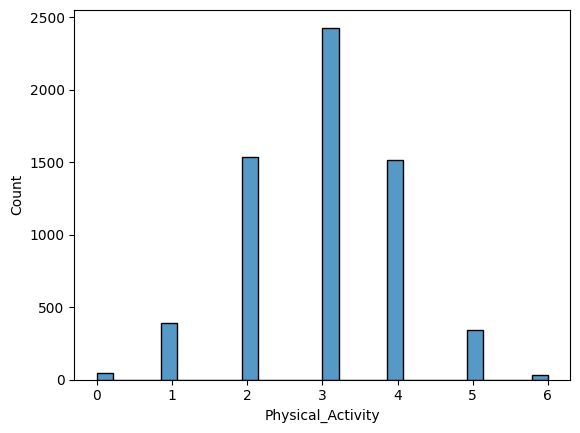

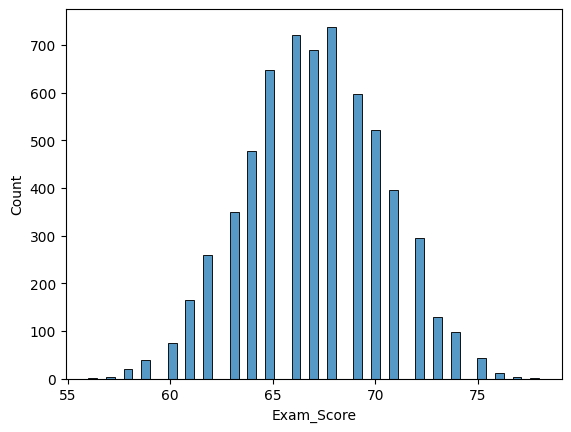

In [18]:
for col in students_db:
    if students_db[col].dtype != 'O':
        sns.histplot(students_db[col])
        plt.show()

so we have a problem here we can't do Correlation Matrix on All the variables while there is a categorical data needs to be encoded first so we will escape a step before Correlation Matrix to encode our data

In [19]:
students_db.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# Encoding Categorical Columns: LabelEncoder vs. OneHotEncoder

## Next Step: Encoding Categorical Columns

We will use both **LabelEncoder** and **OneHotEncoder** for different purposes.

### Why Use Both?

---

### LabelEncoder

**Definition:** Converts each category into an integer (0, 1, 2, …).

**Advantages:**
- Simple and memory-efficient (only one column)
- Works well with tree-based models (Random Forest, XGBoost, LightGBM)
- Fast transformation

**Disadvantages:**
- Creates a fake numeric order between categories
- Can mislead linear and distance-based models (Logistic Regression, SVM, KNN, Neural Networks)

---

### OneHotEncoder

**Definition:** Creates binary columns (dummy variables) for each category.

**Advantages:**
- No fake ordering → categories are treated independently
- Works well with most ML algorithms (regression, neural nets, clustering, etc.)
- Easy to interpret feature importance

**Disadvantages:**
- Increases dataset dimensionality (many new columns)
- Less efficient with features that have thousands of unique categories

---

### Typical Usage Pattern:
1. Use **LabelEncoder** for target variables
2. Use **OneHotEncoder** for feature variables (especially for linear models)

In [20]:
# Ordinal features (have natural order) → LabelEncoder
ordinal_columns = [
    'Parental_Involvement',
    'Access_to_Resources',
    'Motivation_Level',
    'Family_Income',
    'Teacher_Quality',
    'Peer_Influence',
    'Parental_Education_Level',
    'Distance_from_Home'
]

# Nominal features (no natural order) → OneHotEncoder
nominal_columns = [
    'Extracurricular_Activities',
    'Internet_Access',
    'School_Type',
    'Learning_Disabilities',
    'Gender'
]


In [21]:
# ---- Label Encoding for ordinal features ----
label_encoders = {}
for col in ordinal_columns:
    le = LabelEncoder()
    students_db[col] = le.fit_transform(students_db[col])
    label_encoders[col] = le   # store encoders if you need to inverse later

# ---- OneHot Encoding for nominal features ----
ohe = OneHotEncoder(drop="first", sparse_output=False)  # drop="first" avoids dummy trap
ohe_array = ohe.fit_transform(students_db[nominal_columns])

# Convert to DataFrame
ohe_df = pd.DataFrame(ohe_array, columns=ohe.get_feature_names_out(nominal_columns), index=students_db.index)

# Merge and drop original nominal columns
encoded_students_db = pd.concat([students_db.drop(columns=nominal_columns), ohe_df], axis=1)


In [22]:
encoded_students_db.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Learning_Disabilities_Yes,Gender_Male
0,23,84,1,0,7,73,1,0,1,2,2,3,1,2,67,0.0,1.0,1.0,0.0,1.0
1,19,64,1,2,8,59,1,2,2,2,0,4,0,1,61,0.0,1.0,1.0,0.0,0.0
2,24,98,2,2,7,91,2,2,2,2,1,4,2,2,74,1.0,1.0,1.0,0.0,1.0
3,29,89,1,2,8,98,2,1,2,2,0,4,1,1,71,1.0,1.0,1.0,0.0,1.0
4,19,92,2,2,6,65,2,3,2,0,1,4,0,2,70,1.0,1.0,1.0,0.0,0.0


### Correlation Matrix of All Variables

In [23]:
# Move Exam_Score to the last column
exam_col = encoded_students_db.pop("Exam_Score")
encoded_students_db["Exam_Score"] = exam_col


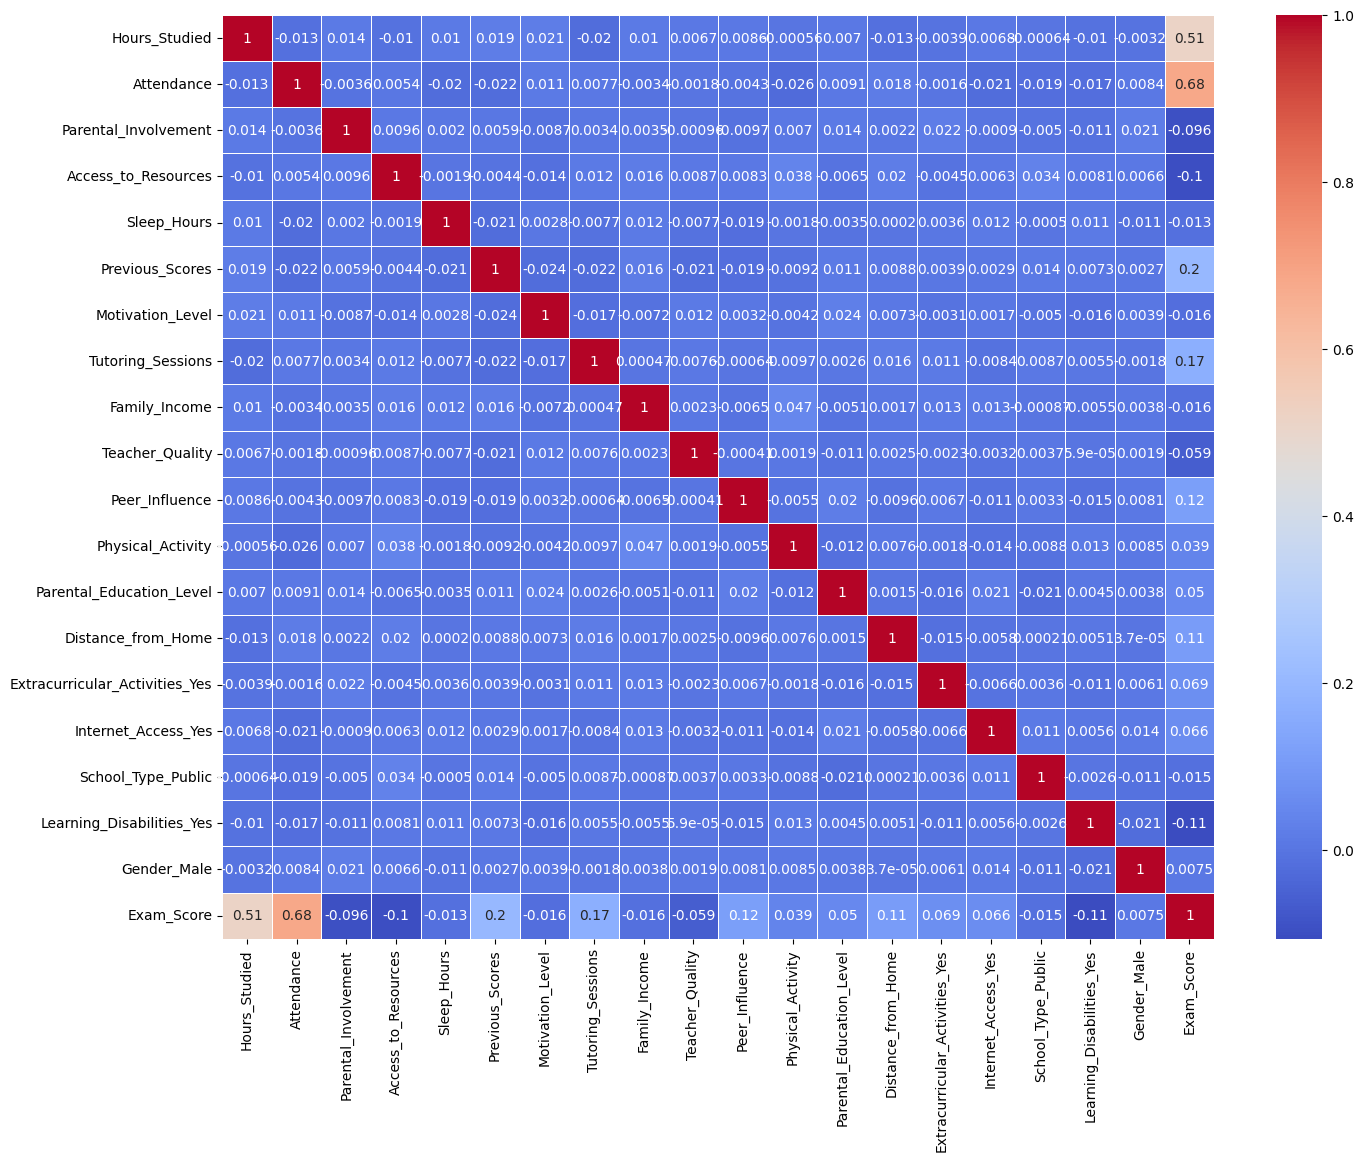

In [24]:
plt.figure(figsize=(16, 12))
correlation_matrix = encoded_students_db.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# Correlation Analysis Summary

## Key Observations

- **Top correlated features with Exam Score:**
  - `Attendance` (**0.68**) – strongest positive impact
  - `Hours_Studied` (0.51)
  - `Previous_Scores` (0.2)
  - `Tutoring_Sessions` (0.17)

- **Low or no correlation:**
  - `Gender`, `Distance_from_Home`, `School_Type`, `Parental_Education_Level`, `Peer_Influence`, `Physical_Activity`
  - These may have negligible or nonlinear impact on exam performance.

- **Mild negative correlation:**
  - `Access_to_Resources` (-0.1)
  - `Parental_Involvement` (-0.094)

---

## Insights
- **Attendance and Hours Studied** are the most important predictors of exam performance.
- Other features like `Parental_Involvement` and `Tutoring_Sessions` also positively influence scores.
- Demographic and lifestyle features show limited direct correlation and may require nonlinear modeling to extract value.

---

# Selected Features for Modeling

## Top Positively Correlated Features to Use:
- `Attendance`
- `Hours_Studied`
- `Parental_Involvement`
- `Previous_Scores`
- `Tutoring_Sessions`
- `Internet_Access`

## Optional Features (Low correlation, explore further):
- `Parental_Education_Level`
- `Teacher_Quality`
- `Access_to_Resources`
- `Family_Income`

## Exclude (for now):
- `Gender`
- `Distance_from_Home`
- `School_Type`
- `Peer_Influence`
- `Physical_Activity`
- `Learning_Disabilities` (unless domain knowledge suggests otherwise)

---


Clearly Safe to Remove: 4 features (Gender_Male, School_Type_Public, Sleep_Hours, Motivation_level)

Potentially Safe to Remove: 3 more features (Family_Income, Physical_Activity, Teacher_Quality)

### Step 5: Feature Engineering
- Encode categorical variables
- Prepare features for modeling

In [25]:
encoded_students_db = encoded_students_db.drop(columns=['Gender_Male','School_Type_Public','Sleep_Hours','Motivation_Level',])
encoded_students_db.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Previous_Scores,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Extracurricular_Activities_Yes,Internet_Access_Yes,Learning_Disabilities_Yes,Exam_Score
0,23,84,1,0,73,0,1,2,2,3,1,2,0.0,1.0,0.0,67
1,19,64,1,2,59,2,2,2,0,4,0,1,0.0,1.0,0.0,61
2,24,98,2,2,91,2,2,2,1,4,2,2,1.0,1.0,0.0,74
3,29,89,1,2,98,1,2,2,0,4,1,1,1.0,1.0,0.0,71
4,19,92,2,2,65,3,2,0,1,4,0,2,1.0,1.0,0.0,70


In [26]:
df = encoded_students_db.copy()

X = df.drop(columns=['Exam_Score'])  # Features
y = df['Exam_Score']                 # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training features shape:", X_train_scaled.shape)
print("Test features shape:", X_test_scaled.shape)

Training features shape: (5024, 15)
Test features shape: (1256, 15)


In [27]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
y_pred = lr_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [29]:
importance = pd.Series(lr_model.coef_, index=X.columns).sort_values(ascending=False)

print("\n Feature Importance (coefficients):")
print(importance)


 Feature Importance (coefficients):
Attendance                        2.294334
Hours_Studied                     1.718654
Previous_Scores                   0.695558
Tutoring_Sessions                 0.593904
Peer_Influence                    0.406932
Distance_from_Home                0.353126
Internet_Access_Yes               0.275728
Extracurricular_Activities_Yes    0.242715
Physical_Activity                 0.222582
Parental_Education_Level          0.115950
Family_Income                    -0.084538
Teacher_Quality                  -0.191412
Learning_Disabilities_Yes        -0.299860
Access_to_Resources              -0.331097
Parental_Involvement             -0.349246
dtype: float64


In [30]:
df = encoded_students_db.copy()
X_poly_raw = df.drop(columns=['Exam_Score'])
y_poly = df['Exam_Score']

X_poly_train_raw, X_poly_test_raw, y_poly_train, y_poly_test = train_test_split(
    X_poly_raw, y_poly, test_size=0.2, random_state=42
)

In [31]:
poly_scaler = StandardScaler()
X_poly_train_scaled = poly_scaler.fit_transform(X_poly_train_raw)
X_poly_test_scaled = poly_scaler.transform(X_poly_test_raw)

In [32]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_poly_train_scaled)
X_poly_test = poly.transform(X_poly_test_scaled)

In [33]:
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_poly_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
y_poly_pred = poly_model.predict(X_poly_test)

In [35]:
mse_poly = mean_squared_error(y_poly_test, y_poly_pred)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_poly_test, y_poly_pred)
r2_poly = r2_score(y_poly_test, y_poly_pred)

In [36]:
def evaluate_model(name, model, params):
    grid = GridSearchCV(model, params, cv=5, scoring="r2", n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    return {
        "Model": name,
        "Best_Params": grid.best_params_,
        "R2": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    }



In [37]:
dt_results = evaluate_model(
    "DecisionTree",
    DecisionTreeRegressor(random_state=42),
    {
        "max_depth": [3, 5, 7, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }
)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [38]:
rf_results = evaluate_model(
    "RandomForest",
    RandomForestRegressor(random_state=42),
    {
        "n_estimators": [100, 200],
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2]
    }
)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [39]:
svr_results = evaluate_model(
    "SVR",
    SVR(),
    {
        "kernel": ["linear", "rbf"],
        "C": [0.1, 1, 10],
        "gamma": ["scale", "auto"]
    }
)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [40]:
mlp_results = evaluate_model(
    "MLP",
    MLPRegressor(max_iter=1000, random_state=42),
    {
        "hidden_layer_sizes": [(50,), (100,), (100, 50)],
        "activation": ["relu", "tanh"],
        "alpha": [0.0001, 0.001],
        "learning_rate": ["constant", "adaptive"]
    }
)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [41]:
xgb_results = evaluate_model(
    "XGBoost",
    XGBRegressor(objective="reg:squarederror", random_state=42),
    {
        "n_estimators": [100, 200],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.1],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0]
    }
)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [42]:
# Display all R² scores in a clear format
print("=" * 60)
print("ALL MODEL R² ACCURACY SCORES")
print("=" * 60)

# Individual model scores
print(f"Polynomial Regression:       {r2_poly:.4f}")
print(f"XGBoost:                     {xgb_results['R2']:.4f}")
print(f"Neural Network (MLP):        {mlp_results['R2']:.4f}")
print(f"Linear Regression:           {r2:.4f}")
print(f"Support Vector Regression:   {svr_results['R2']:.4f}")
print(f"Random Forest:               {rf_results['R2']:.4f}")
print(f"Decision Tree:               {dt_results['R2']:.4f}")
print("\n" + "=" * 60)



ALL MODEL R² ACCURACY SCORES
Polynomial Regression:       0.9803
XGBoost:                     0.9689
Neural Network (MLP):        0.9364
Linear Regression:           0.8904
Support Vector Regression:   0.8891
Random Forest:               0.8863
Decision Tree:               0.7599



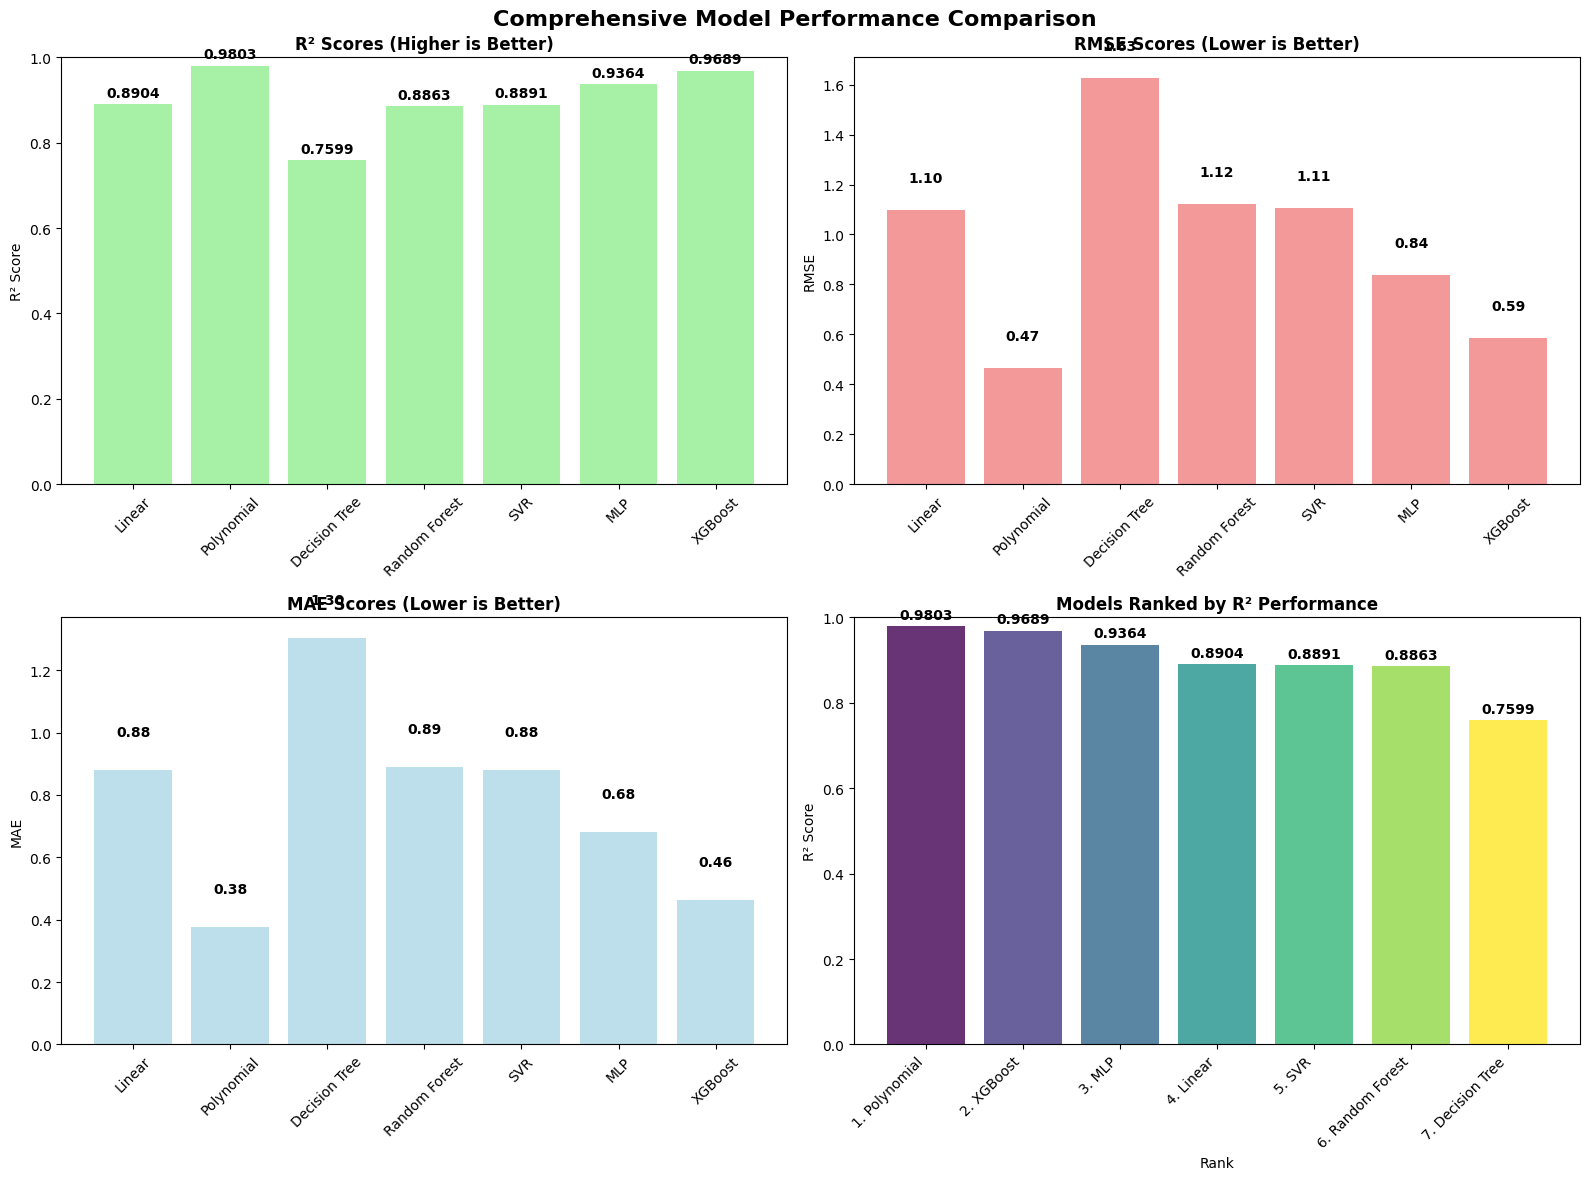

In [43]:

# Prepare data for visualization
models = ['Linear', 'Polynomial', 'Decision Tree', 'Random Forest', 'SVR', 'MLP', 'XGBoost']
r2_scores = [r2, r2_poly, dt_results['R2'], rf_results['R2'], 
            svr_results['R2'], mlp_results['R2'], xgb_results['R2']]
rmse_scores = [rmse, rmse_poly, dt_results['RMSE'], rf_results['RMSE'], 
            svr_results['RMSE'], mlp_results['RMSE'], xgb_results['RMSE']]
mae_scores = [mae, mae_poly, dt_results['MAE'], rf_results['MAE'], 
            svr_results['MAE'], mlp_results['MAE'], xgb_results['MAE']]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comprehensive Model Performance Comparison', fontsize=16, fontweight='bold')

# R² Scores
bars1 = axes[0, 0].bar(models, r2_scores, color='lightgreen', alpha=0.8)
axes[0, 0].set_title('R² Scores (Higher is Better)', fontweight='bold')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, score in zip(bars1, r2_scores):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                    f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

# RMSE Scores
bars2 = axes[0, 1].bar(models, rmse_scores, color='lightcoral', alpha=0.8)
axes[0, 1].set_title('RMSE Scores (Lower is Better)', fontweight='bold')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, score in zip(bars2, rmse_scores):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                    f'{score:.2f}', ha='center', va='bottom', fontweight='bold')

# MAE Scores
bars3 = axes[1, 0].bar(models, mae_scores, color='lightblue', alpha=0.8)
axes[1, 0].set_title('MAE Scores (Lower is Better)', fontweight='bold')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, score in zip(bars3, mae_scores):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                    f'{score:.2f}', ha='center', va='bottom', fontweight='bold')

# Performance Ranking
ranked_indices = sorted(range(len(r2_scores)), key=lambda i: r2_scores[i], reverse=True)
ranked_models = [models[i] for i in ranked_indices]
ranked_scores = [r2_scores[i] for i in ranked_indices]

bars4 = axes[1, 1].bar(range(len(ranked_models)), ranked_scores, 
                        color=plt.cm.viridis(np.linspace(0, 1, len(ranked_models))), alpha=0.8)
axes[1, 1].set_title('Models Ranked by R² Performance', fontweight='bold')
axes[1, 1].set_ylabel('R² Score')
axes[1, 1].set_xlabel('Rank')
axes[1, 1].set_xticks(range(len(ranked_models)))
axes[1, 1].set_xticklabels([f"{i+1}. {model}" for i, model in enumerate(ranked_models)], rotation=45, ha='right')
axes[1, 1].set_ylim(0, 1)

# Add value labels on bars
for i, (bar, score) in enumerate(zip(bars4, ranked_scores)):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                    f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()